In [42]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path

from leaf_disease.datasets.dataset import LeafImageDataset, LeafImageDataModule, split_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
input_path = Path("input")
image_path = Path("input/train_images/")

In [44]:
dfx = pd.read_csv("input/train.csv")
dfx.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


```json
{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}
```

In [45]:
dfx.label.value_counts(normalize=False)

label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64

In [46]:
train, valid = split_data(dfx)
print(f"{train.shape=}")
print(f"{valid.shape=}")

train.shape=(19257, 2)
valid.shape=(2140, 2)


Proportion of the target in the splits

In [47]:
vc_1 = train.label.value_counts(normalize=True).to_frame(name="train")
vc_2 = valid.label.value_counts(normalize=True).to_frame(name="valid")
pd.concat([vc_1, vc_2], axis=1)

,train,valid
label,,
3,0.614945,0.614953
4,0.120424,0.120561
2,0.111544,0.111215
1,0.102300,0.102336
0,0.050787,0.050935


In [48]:
vc_1 = train.label.value_counts(normalize=True).to_frame(name="train")
vc_2 = valid.label.value_counts(normalize=True).to_frame(name="valid")
pd.concat([vc_1, vc_2], axis=1)

,train,valid
label,,
3,0.614945,0.614953
4,0.120424,0.120561
2,0.111544,0.111215
1,0.102300,0.102336
0,0.050787,0.050935


### 4) A quick visual check

In [49]:
from torchvision import datasets, transforms

dm = LeafImageDataModule(image_path=image_path, batch_size=64)
dm.setup()

In [50]:
for images, labels in dm.train_dataloader():  
    break

In [51]:
# (B, C, H, W): batch_size, channel, heigh, width
print(f"{images.shape=}")
print(f"{labels.shape=}")

images.shape=torch.Size([64, 3, 600, 800])
labels.shape=torch.Size([64])


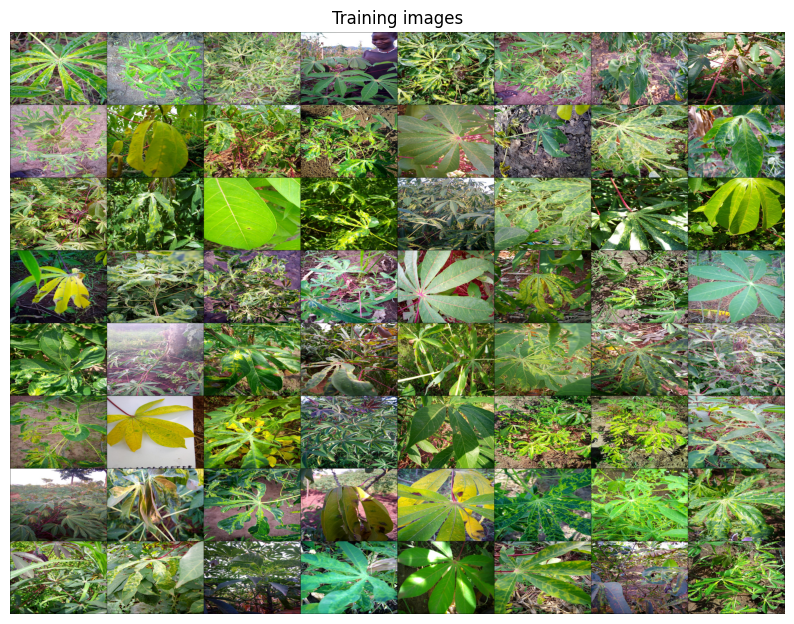

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# for images, labels in dm.train_dataloader():  
#     break

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images, 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

### 5) Visualizing augmentations

Hacer una prueba del dataset transforms. Tengo que devoler un numpy y utilizar el `T.ToImageTensor() y T.ConvertImageDtype()`?

In [176]:
%load_ext autoreload
%autoreload 2


from leaf_disease.datasets.dataset import LeafImageDataset, LeafImageDataModule

from torchvision import datasets, transforms

dm = LeafImageDataModule(image_path=image_path, batch_size=64)
dm.setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
image_path / "63103.jpg"

PosixPath('input/train_images/63103.jpg')

In [171]:
import torchvision.transforms.v2 as T

transform = T.Compose(
    [ 
        # Reshape to [C, W, H]
        T.ToImageTensor(),
        T.RandomResizedCrop((256, 256), antialias=True),
        # T.ConvertImageDtype()
    ]
)

ds = LeafImageDataset([image_path / "6103.jpg"], targets=[1], transform=transform)

In [172]:
X, y = next(iter(ds))
print(X.shape)
X

TypeError: Compose.forward() got an unexpected keyword argument 'image'

In [173]:
print(y)

tensor(1)


In [184]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform = A.Compose(
    [
        A.RandomCrop(height=128, width=128),
        # Reshape to [C, W, H]
        # ToTensorV2(),
    ]


)
ds = LeafImageDataset([image_path / "6103.jpg"], targets=[1], transform=transform)

In [185]:
X, y = next(iter(ds))
print(X.shape)
X

ValueError: Requested crop size (128, 128) is larger than the image size (3, 600)

Hacer un plot de las imagenss para ver como cambian, normal, resize, randomcropresize, y ConvertImageDtype..